In [1]:
import os
import pathlib
# Clone the tensorflow models repository
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3135, done.
remote: Counting objects: 100% (3135/3135), done.
remote: Compressing objects: 100% (2649/2649), done.
remote: Total 3135 (delta 809), reused 1344 (delta 442), pack-reused 0
Receiving objects: 100% (3135/3135), 33.35 MiB | 29.21 MiB/s, done.
Resolving deltas: 100% (809/809), done.


In [2]:
%%shell
python -m pip install --upgrade pip
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 9.8 MB 5.6 MB/s            
     |████████████████████████████████| 352 kB 57.9 MB/s            
     |████████████████████████████████| 1.8 MB 28.9 MB/s            
     |████████████████████████████████| 22.7 MB 1.9 MB/s             
     |████████████████████████████████| 1.3 MB 62.8 MB/s            
     |████████████████████████████████| 4.9 MB 64.7 MB/s            
     |████████████████████████████████| 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Imports

import io
import os
import scipy.misc
import numpy as np
import six
import time
import pathlib
import pandas as pd
from os import listdir
from os.path import isfile, join

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import visualization_utils as viz_utils
from PIL import Image
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Function

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
    path: a file path (this can be local or on colossus)

    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


# Logo categories to print

category_index = {
    1: {'id': 1, 'name': 'Nike'},
    2: {'id': 2, 'name': 'Adidas'},
    3: {'id': 3, 'name': 'Under Starbucks'},
    4: {'id': 4, 'name': 'Apple Inc.'},
    5: {'id': 5, 'name': 'Ralph Lauren Corporation'},
    6: {'id': 6, 'name': 'NFL'},
    7: {'id': 7, 'name': 'Mercedes-Benz'},
    8: {'id': 8, 'name': 'Under Armou'},
    9: {'id': 9, 'name': 'Coca-Cola'},
    10: {'id': 10, 'name': 'Emirates'},
    11: {'id': 11, 'name': 'Hard Rock Cafe'},
    12: {'id': 12, 'name': 'Puma'},
    13: {'id': 13, 'name': 'The North Face'},
    14: {'id': 14, 'name': 'Toyota'},
    15: {'id': 15, 'name': 'Chanel'},
    16: {'id': 16, 'name': 'Intimissimi'},
    17: {'id': 17, 'name': 'Pepsi'},
}



In [10]:
# Load a saved model

tf.keras.backend.clear_session()
detect_fn = tf.saved_model.load('/content/drive/MyDrive/DLCV_group/model_efficientdet_17logos/saved_model')

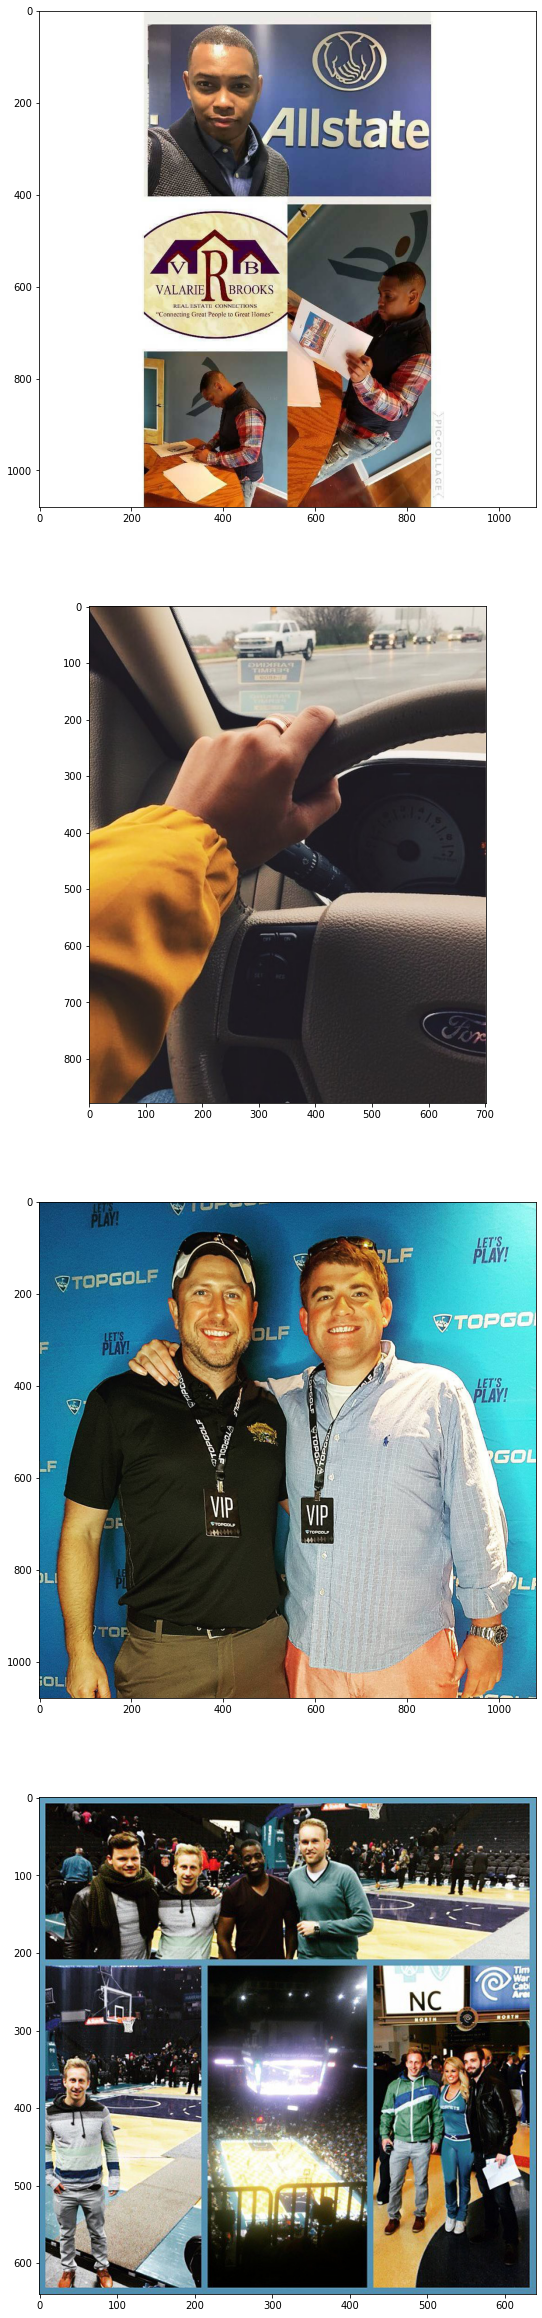

In [8]:
# No detection in noise data

image_dir = '/content/drive/MyDrive/DLCV_group/inference/noise'


imagem_test = [f for f in listdir(image_dir) if isfile(join(image_dir, f))]

j = 0
for i in imagem_test:
    image_path = os.path.join(image_dir, str(i))
    image_size = Image.open(image_path)
    image_np = load_image_into_numpy_array(image_path)
    input_tensor = np.expand_dims(image_np, 0)
    start_time = time.time()
    detections = detect_fn(input_tensor)
    end_time = time.time()
    image_size = [int(i) for i in list(image_size.size)]
    plt.rcParams['figure.figsize'] = [42, 42]
    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=100,
        min_score_thresh=.5,
        agnostic_mode=False)
    plt.subplot(len(imagem_test), 1, j+1)
    j += 1
    plt.imshow(image_np_with_detections)

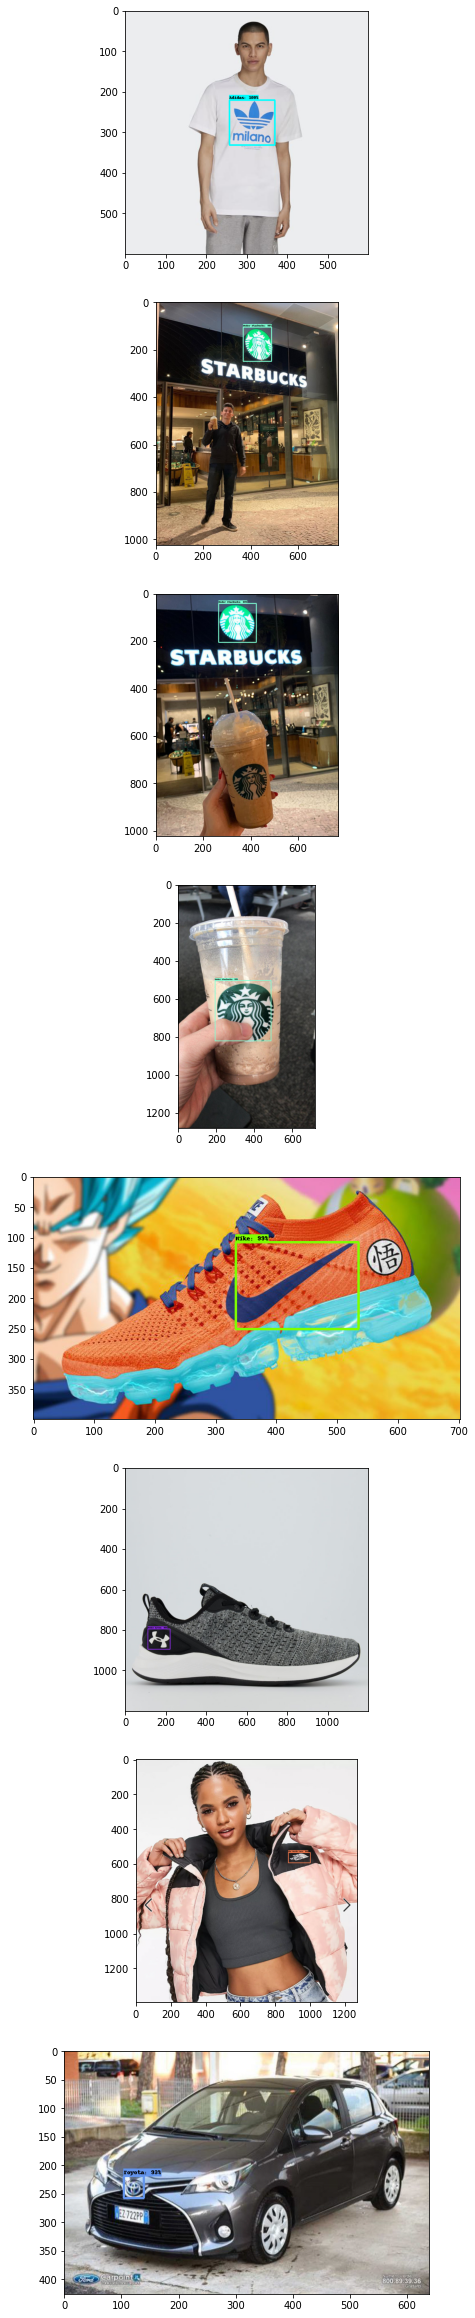

In [12]:
# Detection in personal or downloaded figures

image_dir = '/content/drive/MyDrive/DLCV_group/inference/test'


imagem_test = [f for f in listdir(image_dir) if isfile(join(image_dir, f))]

j = 0
for i in imagem_test:
    image_path = os.path.join(image_dir, str(i))
    image_size = Image.open(image_path)
    image_np = load_image_into_numpy_array(image_path)
    input_tensor = np.expand_dims(image_np, 0)
    start_time = time.time()
    detections = detect_fn(input_tensor)
    end_time = time.time()
    image_size = [int(i) for i in list(image_size.size)]
    plt.rcParams['figure.figsize'] = [42, 42]
    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=100,
        min_score_thresh=.5,
        agnostic_mode=False)
    plt.subplot(len(imagem_test), 1, j+1)
    j += 1
    plt.imshow(image_np_with_detections)